Left Eye Step 1: Eye region coordinates (landmarks):
 [[178 340]
 [223 314]
 [280 318]
 [323 359]
 [271 371]
 [216 367]]


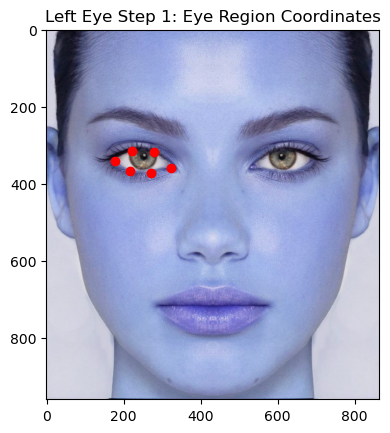

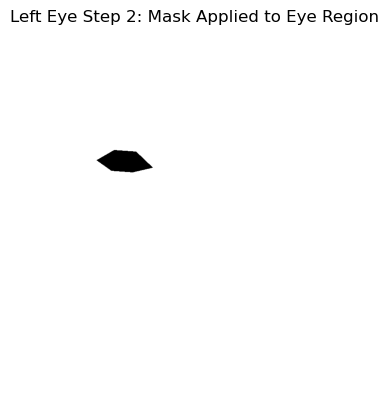

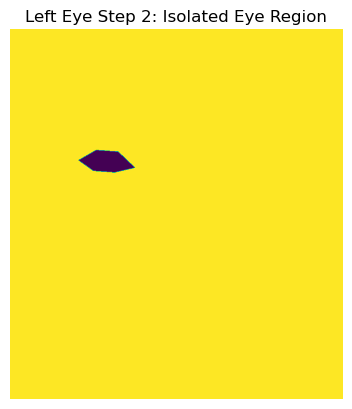

Left Eye Step 3: Cropping Coordinates:
min_x: 173, max_x: 328, min_y: 309, max_y: 376


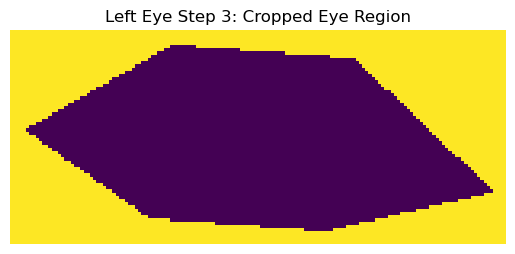

Right Eye Step 1: Eye region coordinates (landmarks):
 [[542 359]
 [584 320]
 [642 315]
 [687 341]
 [648 368]
 [592 371]]


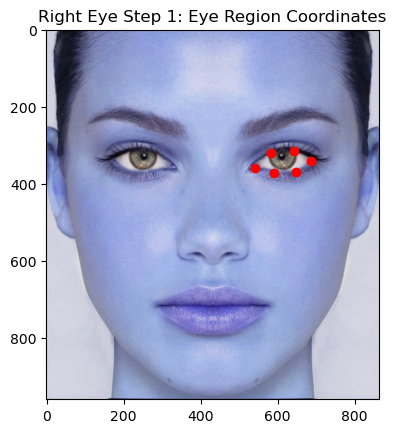

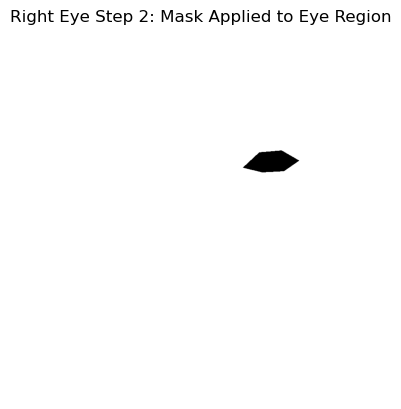

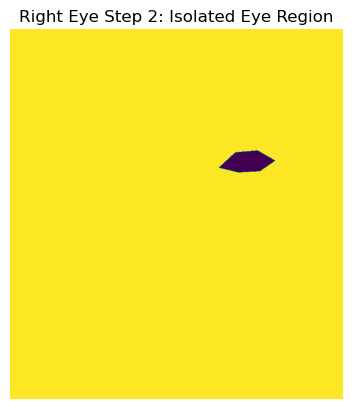

Right Eye Step 3: Cropping Coordinates:
min_x: 537, max_x: 692, min_y: 310, max_y: 376


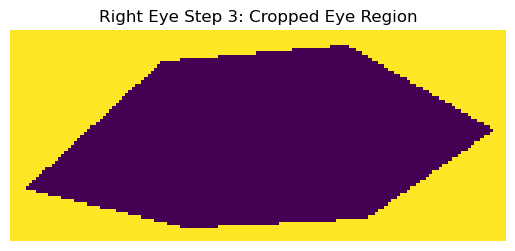

In [1]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
import math


image_path = 'face.png' 


detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")


image = cv2.imread(image_path)
if image is None:
    raise ValueError("Image not found or unable to load!")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


faces = detector(gray_image)
if len(faces) == 0:
    raise ValueError("No faces detected!")


face = faces[0]


landmarks = predictor(gray_image, face)


class Eye:
    LEFT_EYE_POINTS = [36, 37, 38, 39, 40, 41]
    RIGHT_EYE_POINTS = [42, 43, 44, 45, 46, 47]

    def __init__(self, original_frame, landmarks, side):
        self.frame = None
        self.origin = None
        self.center = None
        self.landmark_points = None

        self._analyze(original_frame, landmarks, side)

    @staticmethod
    def _middle_point(p1, p2):
        x = int((p1.x + p2.x) / 2)
        y = int((p1.y + p2.y) / 2)
        return (x, y)

    def _isolate(self, frame, landmarks, points, eye_name):
        """
        Isolates the eye from the rest of the face by following these steps:
        1. Extracts eye region points from landmarks
        2. Creates a mask around the eye region
        3. Crops the eye region
        4. Displays and explains each transformation step-by-step
        """


        region = np.array([(landmarks.part(point).x, landmarks.part(point).y) for point in points])
        print(f"{eye_name} Eye Step 1: Eye region coordinates (landmarks):\n {region}")


        plt.imshow(frame)
        plt.scatter(region[:, 0], region[:, 1], c='red', marker='o')
        plt.title(f'{eye_name} Eye Step 1: Eye Region Coordinates')
        plt.show()


        region = region.astype(np.int32)
        height, width = frame.shape[:2]


        black_frame = np.zeros((height, width), np.uint8)


        mask = np.full((height, width), 255, np.uint8)


        cv2.fillPoly(mask, [region], (0, 0, 0))


        eye = cv2.bitwise_not(black_frame, frame.copy(), mask=mask)


        plt.imshow(mask, cmap='gray')
        plt.title(f'{eye_name} Eye Step 2: Mask Applied to Eye Region')
        plt.axis('off')
        plt.show()

        plt.imshow(eye)
        plt.title(f'{eye_name} Eye Step 2: Isolated Eye Region')
        plt.axis('off')
        plt.show()


        margin = 5


        min_x = np.min(region[:, 0]) - margin
        max_x = np.max(region[:, 0]) + margin
        min_y = np.min(region[:, 1]) - margin
        max_y = np.max(region[:, 1]) + margin


        print(f"{eye_name} Eye Step 3: Cropping Coordinates:\n"
              f"min_x: {min_x}, max_x: {max_x}, min_y: {min_y}, max_y: {max_y}")


        self.frame = eye[min_y:max_y, min_x:max_x]
        self.origin = (min_x, min_y)

        height, width = self.frame.shape[:2]
        self.center = (width / 2, height / 2)


        plt.imshow(self.frame)
        plt.title(f'{eye_name} Eye Step 3: Cropped Eye Region')
        plt.axis('off')
        plt.show()

    def _analyze(self, original_frame, landmarks, side):
        """
        Determines whether it's the left or right eye and isolates it.
        """
        if side == 0:
            points = self.LEFT_EYE_POINTS
            self._isolate(original_frame, landmarks, points, eye_name="Left")
        else:
            points = self.RIGHT_EYE_POINTS
            self._isolate(original_frame, landmarks, points, eye_name="Right")


left_eye = Eye(image, landmarks, 0)  
right_eye = Eye(image, landmarks, 1)  
